# Movie Rating Prediction

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
df = pd.read_csv("../Dataset/Train.csv")

In [131]:
df.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [132]:
df.shape

(40000, 2)

In [133]:
df.columns

Index(['review', 'label'], dtype='object')

In [134]:
WorkingData = df.copy()

In [135]:
WorkingData.isnull().sum()

review    0
label     0
dtype: int64

In [136]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

<AxesSubplot: title={'center': 'Count of number of labels'}>

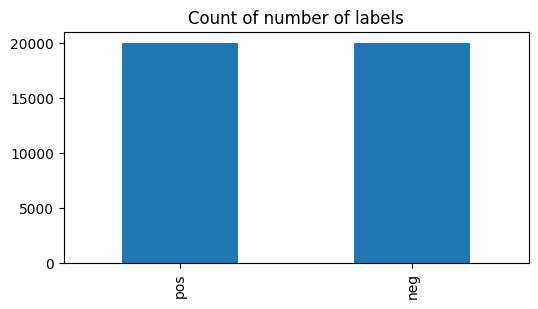

In [137]:
WorkingData['label'].value_counts().plot(kind='bar', title="Count of number of labels", figsize = (6,3))

### Label Encoding for Target Axis

In [138]:
from sklearn import preprocessing

In [139]:
label_encoder = preprocessing.LabelEncoder()

WorkingData['label'] = label_encoder.fit_transform(WorkingData['label'])

In [140]:
WorkingData['label'].unique()

array([1, 0])

In [141]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [142]:
WorkingData['label'].value_counts()

1    20011
0    19989
Name: label, dtype: int64

In [143]:
WorkingData.head()

,review,label
0,mature intelligent and highly charged melodram...,1
1,http://video.google.com/videoplay?docid=211772...,1
2,Title: Opera (1987) Director: Dario Argento Ca...,1
3,I think a lot of people just wrote this off as...,1
4,This is a story of two dogs and a cat looking ...,1


In [144]:
y = WorkingData['label'].values

In [145]:
y

array([1, 1, 1, ..., 0, 1, 1])

### Data Cleaning and Processing in Review Column

In [146]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sabbo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

In [148]:
WorkingData["review"][2000]

"I'm watching the series again now that it's out on DVD (yay!) It's striking me as fresh, as relevant and as intriguing as when it first aired.<br /><br />The central performances are gripping, the scripts are layered.<br /><br />I'll stick my neck out and put it up there with The Prisoner as a show that'll be winning new fans and still be watched come 2035.<br /><br />I've been asked to write some more line (it seems IMDb is as user unfriendly and anally retentively coded as ever! Pithy and to the point is clearly not the IMDb way.)<br /><br />Well, unlike IMDb's submissions editors, American Gothic understands that simplicity is everything.<br /><br />In 22 episodes, the show covers more character development than many shows do in seven seasons. On top of which it questions personal ethics and strength of character in a way which challenges the viewer at every turn to ask themselves what they would choose and what they would think in a given situation.<br /><br />When the show first 

In [149]:
# Import the Porter stemming algorithm from the NLTK library
from nltk.stem.porter import PorterStemmer

# Create a new instance of the Porter stemming algorithm
ps = PorterStemmer()

# Define a function to clean a sample of text
def clean_text(sample):
  # Convert the text to lowercase
  sample = sample.lower()

  # Remove non-alphabetic characters and replace with spaces
  sample = re.sub("[^a-zA-Z]+"," ", sample)

  # Split the text into individual words
  sample = sample.split()

  # Apply stemming to each word and remove stopwords
  sample = [ps.stem(s) for s in sample if s not in sw]

  # Join the stemmed words back into a single string
  sample = " ".join(sample)

  # Return the cleaned text sample
  return sample


In [150]:
clean_text(WorkingData["review"][10000]) # Example for the fucntion

'account event cover print sever time read two book voyag madmen strang last voyag donald crowhurst see film sheffield christma must say exceed expect tell sunday time golden globe yacht race men set someth never done support vessel wooden boat satellit phone gp wit skill get round globe one piec mention month solitud thunder southern ocean littl sleep boat often liter fall apart around br br documentari excel put togeth opinion tightli edit well pace superb narrat archiv footag interview fascin bring stori life clare crowhurst interview footag especi reveal move relat event led husband donald crowhurst departur teignmouth doubt fear mind reaction subsequ event unfold br br move even shed tear two time credit start roll overheard peopl express similar feel br br two book mention use detail back stori fit minut would recommend br br ultim true stori human courag human frailti must see anyon interest sail adventur human endeavour real life hero'

In [ ]:
# Apply the fucntion to dataset text column
WorkingData['processed_review'] = WorkingData['review'].apply(clean_text)

In [ ]:
WorkingData.head()

In [ ]:
# Extract the 'processed_text' column from the WorkingData_2 DataFrame
processed_review = WorkingData['processed_review']

# Convert the processed text column to a NumPy array
corpus = processed_review.values

In [ ]:
corpus

### Data Transformation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
cv = CountVectorizer(max_df = 0.5, max_features=50000)

In [ ]:
X = cv.fit_transform(corpus)

In [ ]:
print(X[0])

In [ ]:
tfidf = TfidfTransformer()

In [ ]:
X = tfidf.fit_transform(X)

In [ ]:
print(X[0])

In [ ]:
X =tf.sparse.reorder

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X[:50]

In [ ]:
y[:50]

## ANN

In [113]:
import tensorflow as tf

In [114]:
from keras import models
from keras.layers import Dense

In [115]:
model = models.Sequential()
model.add( Dense(16, activation="relu", input_shape = (X.shape[1],) ) )
model.add( Dense(16, activation="relu") )
model.add( Dense(1, activation="sigmoid"))

In [116]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                800016    
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 800,305
Trainable params: 800,305
Non-trainable params: 0
_________________________________________________________________


In [117]:
model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=['accuracy'])

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [119]:
# X_val = X[:5000]
# X_train = X[5000:]

# y_val = y[:5000]
# y_train = y[5000:]

In [120]:
X_train.shape, y_train.shape

((28000, 50000), (28000,))

In [55]:
# hist = model.fit(X, y, batch_size=128, epochs=10, validation_data=(X_test, y_test))

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

InvalidArgumentError: {{function_node __wrapped__SerializeManySparse_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,48506] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SerializeManySparse]

In [ ]:
result = hist.history

In [ ]:
plt.plot(result['val_acc'], label = "Val acc")
plt.plot(result['acc'], label = "Train acc")
plt.legend()
plt.show()

In [ ]:
plt.plot(result['val_loss'], label = "Val loss")
plt.plot(result['loss'], label = "Train loss")
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_val, y_val)

### Test